# Mathematik für Biologiestudierende

Wintersemester 2025/26

27.01.2026

&copy; 2026 Prof. Dr. Rüdiger W. Braun 

# Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)

# Themen

* Korrelation

In [2]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd
from scipy import stats

# Korrelation

* Eine Korrelation zwischen zwei Datensätzen ist eine gemeinsame oder gegenläufige Tendenz.
* Beispielsweise steigt der Blutdruck tendenziell mit dem Alter.
* Gemessen wird die Korrelation durch den empirischen Korrelationskoeffizienten.
* Der empirischen Korrelationskoeffizient beantwortet die Frage
 
>      Gibt es eine Korrelation?

### Beispiel für zwei unkorrelierte Größen

* formal ist es auch möglich, Regressionsplot für zwei unkorrelierte Größen auszurechnen

In [25]:
zufall = pd.DataFrame()
zufall['Zufall1'] = stats.norm.rvs(size=30)
zufall['Zufall2'] = stats.norm.rvs(size=30)
zufall.head()

,Zufall1,Zufall2
0,-1.483152,-0.094099
1,1.721751,1.366660
2,0.749523,0.346722
3,1.509558,-0.972874
4,0.234049,0.004293


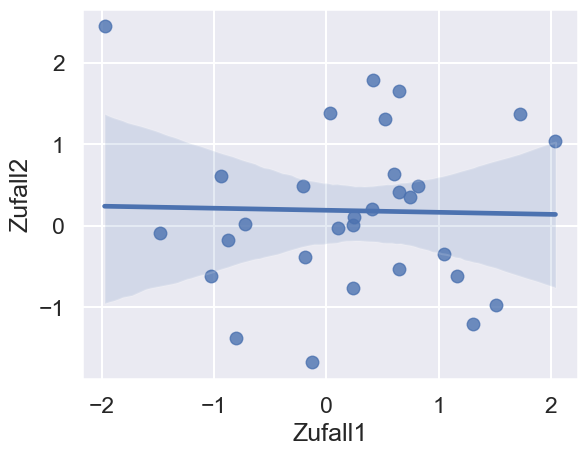

In [26]:
sns.regplot(zufall, x='Zufall1', y='Zufall2');

# Empirischer Korrelationskoeffizient

* Kennzahl zur Überprüfung gemeinsamer Tendenz
* $s_x$ sei die Stichprobenstreuung der $x_j$ und $s_y$ die Stichprobenstreuung der $y_j$ 
* dann ist der *empirische Korrelationskoeffizient* gleich
$$      r = \frac{\text{covar}_{\text{emp}}(x,y)}{s_x \cdot s_y} $$

* Der Korrelationskoeffizient ist dimensionslos

### Beispiel "Zufall"

In [27]:
zufall.cov()

,Zufall1,Zufall2
Zufall1,0.888377,-0.022274
Zufall2,-0.022274,0.970242


In [28]:
sx = zufall.Zufall1.std()
sx

0.9425375095264118

In [29]:
sy = zufall.Zufall2.std()
sy

0.985008603853701

In [30]:
covar = zufall.Zufall1.cov(zufall.Zufall2)
covar

-0.022274403404293756

In [31]:
r = covar / (sx*sy)
r

-0.023992053115276364

## Interpretation des empirischen Korrelationskoeffizienten

Der Korrelationskoeffizient zeigt an, ob zwei Datensätze eine gemeinsame Tendenz aufweisen

* wenn er nahe bei $1$ liegt, dann wachsen $x$ und $y$ gemeinsam (gemeinsame Tendenz)
* wenn er nahe bei $-1$ liegt, dann fällt $y$, wenn $x$ wächst (gegenläufige Tendenz)
* wenn er nahe bei $0$ liegt, dann gibt es kein gemeinsames Verhalten

* auch ein negativer Korrelationskoeffizient hat eine Bedeutung
* Beispiel:  Je weniger Pestizide ich im Garten ausbringe, desto mehr Bienen habe ich

## Berechnung mit `pandas`

In [32]:
zufall.corr()

,Zufall1,Zufall2
Zufall1,1.000000,-0.023992
Zufall2,-0.023992,1.000000


#### Beispiel: Blutdruckdaten

Wir hatten in der letzten Woche die Kovarianzen für die Blutdruckdaten bestimmt 

In [33]:
blutdruck = pd.read_csv('blutdruckdaten.csv')
blutdruck.cov()

,Alter,Blutdruck,Größe
Alter,231.131034,348.572414,36.128966
Blutdruck,348.572414,750.271264,69.805057
Größe,36.128966,69.805057,28.617195


Jetzt bestimmen wir die Korrelationskoeffizienten

In [35]:
blutdruck.corr()

,Alter,Blutdruck,Größe
Alter,1.000000,0.837056,0.444235
Blutdruck,0.837056,1.000000,0.476392
Größe,0.444235,0.476392,1.000000


* Alter und Blutdruck sind korreliert (aber nicht stark)
* die anderen Größen sind nicht korreliert

#### Beispielgraph mit sehr guter Korrelation

In [36]:
df1 = pd.DataFrame()
P = stats.norm(0.005, 0.005)
stoerung = P.rvs(size=30)     # ganz kleine Störung
df1['Länge'] = np.arange(30)
df1['Breite'] = 5 - 0.002*df1.Länge + stoerung
df1.head()

,Länge,Breite
0,0,5.007768
1,1,5.003552
2,2,5.002345
3,3,4.995630
4,4,4.999107


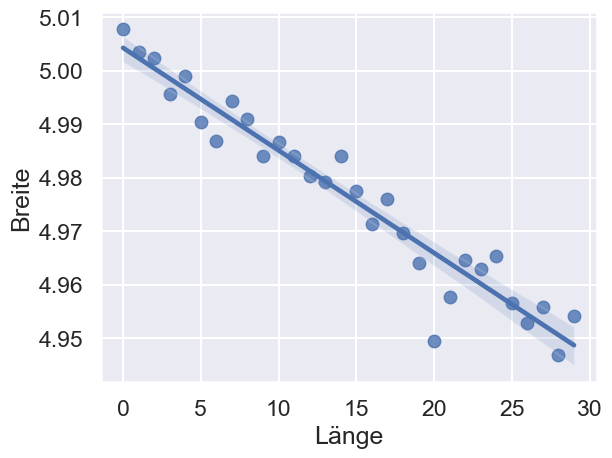

In [37]:
sns.regplot(df1, x='Länge', y='Breite');

In [38]:
df1.corr()

,Länge,Breite
Länge,1.000000,-0.963837
Breite,-0.963837,1.000000


Das darf man nicht verwechseln mit der Steigung der Regressionsgeraden

In [39]:
m = df1.Länge.cov(df1.Breite) / df1.Länge.var()
m

-0.0019189916196473546

# Regression zum Mittelwert

* Der Begriff *Regression* kommt von Francis Galton, einem Neffen von Charles Darwin
* Er hatte den auf der nächsten Folie gezeigten Datensatz analysiert
* Auf der $x$-Achse stehen die Größen der Väter in Zoll
* Auf der $y$-Achse stehen die Größen der Söhne in Zoll

In [41]:
galton = pd.read_csv('galton.csv')
galton.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,002,75.5,66.5,73.66,4,1,male,73.5
2,002,75.5,66.5,73.66,4,2,male,72.5
3,003,75.0,64.0,72.06,2,1,male,71.0
4,004,75.0,64.0,72.06,5,1,male,70.5


* Aufbereitung eines Datensatzes von Galton.  Die Aufbereitung stammt aus den Begleitdaten zum Buch "Linear Models with Python" von Faraway

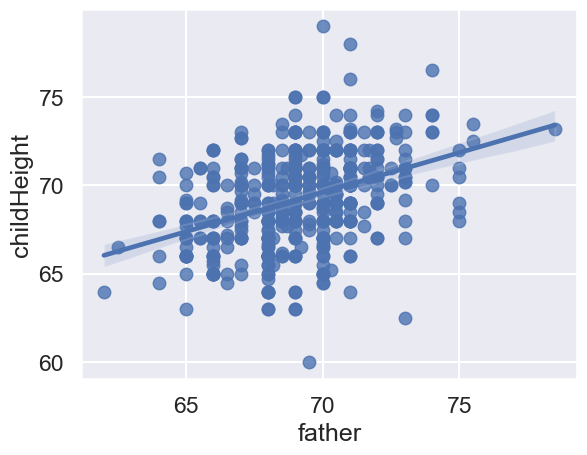

In [43]:
sns.regplot(galton, x='father', y='childHeight');

Die Steigung dieser Geraden ist positiv, aber deutlich kleiner als 1

In [44]:
m = galton.father.cov(galton.childHeight) / galton.father.var()
m

0.44652260468787525

## Regression zum Mittelwert:  Interpretation

* Die Söhne ungewöhnlich großer oder kleiner Väter sind im Mittel selbst zwar auch größer bzw. kleiner als der Mittelwert, aber diese Differenz ist kleiner als bei den Vätern
* Galton bezeichnet dies (ziemlich unfreundlich) als "Regression to mediocrity"
* Das gilt aber nur für die Individuen, nicht für die Population als Ganzes
* auch in der nächsten Generation gibt es wieder ungewöhnlich große Individuen, aber in anderen Familien

# Korrelation &ne; Kausalität

* Wenn der Korrelationskoeffizient von $x$ und $y$ nahe $0$ liegt, dann gibt es keinen kausalen Zusammenhang     zwischen ihnen (seltene nichtlineare Pänomene mal ausgenommen)
* Man kann aber im umgekehrten Fall von einem Korrelationskoeffizienten nahe bei $1$ nicht auf einen kausalen     Zusammenhang schließen

* Zum Beispiel nimmt seit Jahrzehnten in Deutschland sowohl die Zahl der Geburten als auch die Zahl der Störche ab
* Der kausale Zusammenhang ist aber umstritten

* Beispiel aus der Schlafforschung:  Mittagsschlafdauern über 90 Minuten sind ungesund 

<img src="https://imgs.xkcd.com/comics/correlation.png" alt="xkcd Cartoon 552" width="80%"  />

Quelle: http://xkcd.com/552

#### Beispiel: Bleibelastung im Gewebe von Ratten

* kontaminiertes Gelände: fange 10 Ratten
* unbelastetes Vergleichsgelände:  fange 10 Ratten
* für jede Ratte wird ihr Alter in Monaten und der Bleigehalt im Gewebe bestimmt

In [46]:
ratten = pd.read_csv('ratten.csv')
ratten.head()

,Alter,Belastung,Gelände
0,10,63,unkontaminiert
1,12,67,unkontaminiert
2,6,55,unkontaminiert
3,6,42,unkontaminiert
4,11,73,unkontaminiert


In [47]:
kon = ratten[ratten.Gelände=='kontaminiert']
unk = ratten[ratten.Gelände=='unkontaminiert']

In [48]:
kon.describe()

,Alter,Belastung
count,10.000000,10.000000
mean,7.700000,66.500000
std,2.451757,10.384283
min,4.000000,50.000000
25%,6.250000,61.000000
50%,8.000000,66.000000
75%,9.750000,75.250000
max,11.000000,81.000000


In [49]:
unk.describe()

,Alter,Belastung
count,10.000000,10.000000
mean,9.700000,62.500000
std,2.451757,11.017663
min,6.000000,42.000000
25%,8.250000,55.750000
50%,10.000000,65.000000
75%,11.750000,72.000000
max,13.000000,75.000000


* Es gibt einen Unterschied in der Bleibelastung
* aber auch eine große Stichprobenstreuung

In [51]:
stats.ttest_ind(unk.Belastung, kon.Belastung, alternative='less')

TtestResult(statistic=-0.8354714854531734, pvalue=0.20720251637482168, df=18.0)

* Der Unterschied ist $\alpha = 0.05$ nicht signifikant.
* Es fällt aber auf, dass die Ratten von dem belasteten Gebiet im Mittel jünger als die anderen sind.
* Wir wollen das Alter herausrechnen

* Steigt die Bleibelastung mit dem Alter?

In [54]:
kon.corr(numeric_only=True)   #  ohne die Option gibt es einen ValueEror

,Alter,Belastung
Alter,1.000000,0.796465
Belastung,0.796465,1.000000


In [55]:
unk.corr(numeric_only=True)

,Alter,Belastung
Alter,1.00000,0.82883
Belastung,0.82883,1.00000


Wir zeigen beide Regressionen in einem Bild

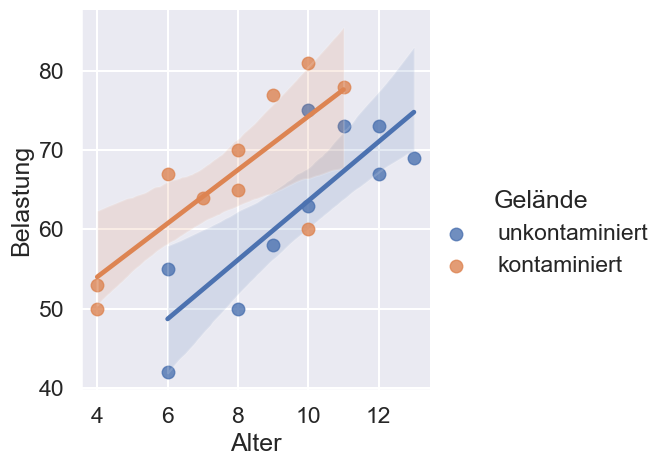

In [56]:
sns.lmplot(ratten, x='Alter', y='Belastung', hue='Gelände');

* die Gerade zu den Daten des kontaminierten Geländes liegt klar oberhalb der Geraden des unkontaminierten Geländes
* für 8 Monate alte Ratten sind dir Konfidenzintervalle disjunkt

* `sns.lmplot` vereint mehrere regplots, ähnlich wie das `sns.displot` tut
* es hat auch ähnliche Optionen

# Lineare Modelle

* eine lineare Funktion einer Variablen ist eine Funktion der Form
$$   y = m \cdot x + b
$$
* bei der linearen Regression besteht die Aufgabe darin, $m$ und $b$ zu bestimmen

Das Konzept des linearen Modells erweitert dieses Verfahren in doppelter Hinsicht

* Konfidenzintervalle für $m$ und $b$ werden bestimmt
* die Zielvariable $y$ kann von mehr als einer Größe abhängen

* Literatur: "Linear Models with Python" von Faraway
* Statsmodels: https://www.statsmodels.org/stable/user-guide.html

Wir beginnen mit den Blutdruckdaten

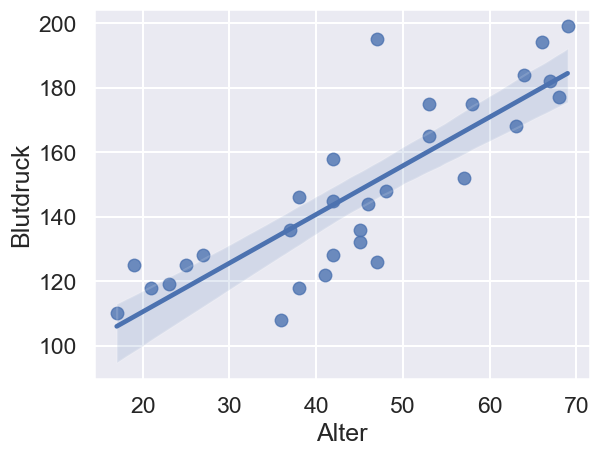

In [57]:
sns.regplot(blutdruck, x='Alter', y='Blutdruck');

# Formulierung des Modells

In [58]:
import statsmodels.formula.api as smf

In [59]:
formel = 'Blutdruck ~ Alter'

Das bedeutet:

* wir wollen den Blutdruck modellieren
* der Blutdruck ist die *abhängige Variable* (engl.  dependent)
* das Alter ist die *erklärende Variable*

In [61]:
modell = smf.ols(formel, blutdruck)

* `ols`: ordinary least squares
* Lektion 22: die Regression ist "bestmöglich" in dem Sinn, dass
$$
    \sum_{j=1}^n (m \cdot x_j + b - y_j)^2 
$$
minimal wird
* daher der Name "Methode der kleinsten Quadrate"  (engl. "lest squares")

In [62]:
res = modell.fit()

# Interpretation der Ausgabe

In [63]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Blutdruck   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     65.54
Date:                Sun, 25 Jan 2026   Prob (F-statistic):           8.17e-09
Time:                        11:52:34   Log-Likelihood:                -123.27
No. Observations:                  30   AIC:                             250.5
Df Residuals:                      28   BIC:                             253.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.3697      8.798      9.135      0.000      62.348      98.391
Alter          1.5081      0.186      8.096      0.000       1.127       1.890
==============================================================================
Omnibus:                        2.886   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                1.526
Skew:                           0.390   Prob(JB):                        0.466
Kurtosis:                       3.782   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Ich werde die wichtigsten Daten aus dieser Ausgabe erkären

* in der ersten Zeile steht der Name der abhängigen Variablen

zum Vergleich:  wir hatten in Lektion 25 die lineare Regression zu Fuß gerechnet und für die Steigung den folgenden Wert erhalten:

In [68]:
cov = blutdruck.Alter.cov(blutdruck.Blutdruck)
var_x = blutdruck.Alter.var()
m = cov / var_x
np.round(m, 4)

1.5081

* Das ist genau die Zahl, die in der Spalte `coef` der Zeile `Alter` steht

* Der Wert für den Ordinatenabschnitt (engl: "intercept") war damals

In [69]:
xq = blutdruck.Alter.mean()
yq = blutdruck.Blutdruck.mean()
b = yq - m*xq
np.round(b, 4)

80.3697

* Das ist die Zahl, die in der Spalte `coef` und der Zeile `Intercept` steht

Wir schauen uns die Zeile `Alter` weiter an:

In [70]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Blutdruck   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     65.54
Date:                Sun, 25 Jan 2026   Prob (F-statistic):           8.17e-09
Time:                        11:58:30   Log-Likelihood:                -123.27
No. Observations:                  30   AIC:                             250.5
Df Residuals:                      28   BIC:                             253.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.3697      8.798      9.135      0.000      62.348      98.391
Alter          1.5081      0.186      8.096      0.000       1.127       1.890
==============================================================================
Omnibus:                        2.886   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                1.526
Skew:                           0.390   Prob(JB):                        0.466
Kurtosis:                       3.782   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Der Eintrag `P>|t|` bezeichnet den p-Wert für den zweiseitigen Test, dass `coef` ungleich 0 ist.
* In der Zeile "Alter" ist `coef` ist die Steigung der linearen Regression, also das $m$ 

* wenn die Nullhypothese $H_0=\{m=0\}$ nicht abgelehnt werden kann, dann bedeutet das, dass zum Signifikanzniveau $\alpha=0.05$ nicht nachgewiesen wurde, dass das Alter überhaupt einen Einfluss auf den Blutdruck hat

* Der Eintrag `t` ist der Wert der Teststatistik, aus dem der p-Wert bestimmt worden ist